C:\Users\DEll\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\DEll\AppData\Local\Temp\ipykernel_16800\1431151141.py:136: RuntimeWarning: invalid value encountered in scalar subtract
  theta1 -= alpha * d_theta1
C:\Users\DEll\AppData\Local\Temp\ipykernel_16800\1431151141.py:135: RuntimeWarning: overflow encountered in scalar multiply
  theta0 -= alpha * d_theta0
C:\Users\DEll\AppData\Local\Temp\ipykernel_16800\1431151141.py:135: RuntimeWarning: invalid value encountered in scalar subtract
  theta0 -= alpha * d_theta0
C:\Users\DEll\AppData\Local\Temp\ipykernel_16800\1431151141.py:134: RuntimeWarning: overflow encountered in multiply
  d_theta1 = (1/m) * np.sum(error * X)


Results for vi and vii saved as results_vi.csv and results_vii.csv


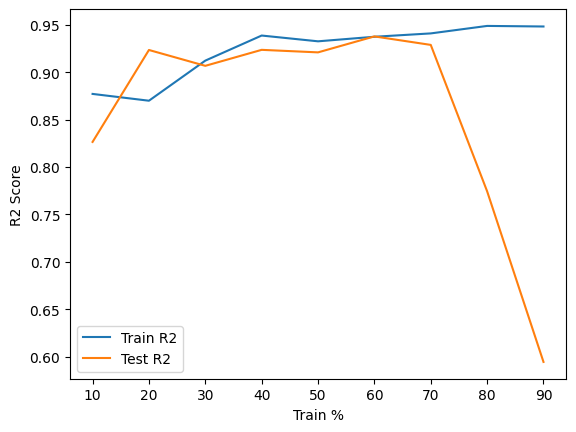

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

data = pd.read_csv("salary_data.csv")
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
X = data["YearsExperience"].values
y = data["Salary"].values


train_sizes = [10,20,30,40,50,60,70,80,90]
splits = []
for size in train_sizes:
    n_train = int(len(X) * size / 100)
    X_train, X_test = X[:n_train], X[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]
    splits.append((X_train, y_train, X_test, y_test))


def gradient_descent(X, y, alpha=0.001, iterations=10000):
    m = len(X)
    theta0, theta1 = 0, 0
    for _ in range(iterations):
        y_pred = theta0 + theta1 * X
        error = y_pred - y
        d_theta0 = (1/m) * np.sum(error)
        d_theta1 = (1/m) * np.sum(error * X)
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
    return theta0, theta1

def mean_rss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)



results = []
for i, (X_train, y_train, X_test, y_test) in enumerate(splits):
    theta0, theta1 = gradient_descent(X_train, y_train, alpha=0.001, iterations=5000)
    y_pred_train = theta0 + theta1 * X_train
    y_pred_test = theta0 + theta1 * X_test
    train_rss = mean_rss(y_train, y_pred_train)
    test_rss = mean_rss(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append([train_sizes[i], theta0, theta1, train_rss, test_rss, train_r2, test_r2])


plt.figure(figsize=(10, 6))
X_line = np.linspace(min(X), max(X), 100)

for i, (X_train, y_train, _, _) in enumerate(splits):
    theta0, theta1 = results[i][1], results[i][2]
    y_line = theta0 + theta1 * X_line
    plt.plot(X_line, y_line, label=f"{train_sizes[i]}% train")

plt.scatter(X, y, color="black", label="Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Hypotheses from Different Training Splits")
plt.legend()
plt.savefig("hypotheses_lines.png") 
plt.close()

import openpyxl
from openpyxl import Workbook

wb = Workbook()
ws = wb.active
ws.title = "Test Predictions"

row = 1
for i, (X_train, y_train, X_test, y_test) in enumerate(splits):
    theta0, theta1 = results[i][1], results[i][2]
    y_pred_test = theta0 + theta1 * X_test

    ws.cell(row=row, column=1, value=f"Train Size: {train_sizes[i]}%")
    row += 1
    ws.cell(row=row, column=1, value="X_test")
    ws.cell(row=row, column=2, value="y_test")
    ws.cell(row=row, column=3, value="y_pred")
    row += 1

    for j in range(len(X_test)):
        ws.cell(row=row, column=1, value=X_test[j])
        ws.cell(row=row, column=2, value=y_test[j])
        ws.cell(row=row, column=3, value=y_pred_test[j])
        row += 1
    row += 2

wb.save("test_predictions_2.xlsx")


with open("results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Train %", "Theta0", "Theta1", "Train_RSS", "Test_RSS", "Train_R2", "Test_R2"])
    writer.writerows(results)

train_perc = [r[0] for r in results]
train_rss_vals = [r[3] for r in results]
test_rss_vals = [r[4] for r in results]
train_r2_vals = [r[5] for r in results]
test_r2_vals = [r[6] for r in results]

plt.plot(train_perc, train_rss_vals, label="Train RSS")
plt.plot(train_perc, test_rss_vals, label="Test RSS")
plt.xlabel("Train %")
plt.ylabel("Mean RSS")
plt.legend()
plt.savefig("rss_plot.png")
plt.clf()

plt.plot(train_perc, train_r2_vals, label="Train R2")
plt.plot(train_perc, test_r2_vals, label="Test R2")
plt.xlabel("Train %")
plt.ylabel("R2 Score")
plt.legend()
plt.savefig("r2_plot.png")


def gradient_descent_init(X, y, alpha=0.001, iterations=5000, theta0_init=0, theta1_init=0):
    m = len(X)
    theta0, theta1 = theta0_init, theta1_init
    for _ in range(iterations):
        y_pred = theta0 + theta1 * X
        error = y_pred - y
        d_theta0 = (1/m) * np.sum(error)
        d_theta1 = (1/m) * np.sum(error * X)
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
    return theta0, theta1


best_idx = np.argmax([r[6] for r in results]) 
X_train_best, y_train_best, X_test_best, y_test_best = splits[best_idx]


theta_inits = {
    "first": (0, 0),
    "second": (np.random.uniform(0, 1), np.random.uniform(0, 1)),
    "third": (np.random.uniform(0, 100), np.random.uniform(0, 100))
}


learning_rates = [0.0001, 0.05, 0.1, 1, 10, 100, 1000]

results_vi = []
for name, (t0_init, t1_init) in theta_inits.items():
    theta0, theta1 = gradient_descent_init(
        X_train_best, y_train_best,
        alpha=0.001,
        iterations=5000,
        theta0_init=t0_init,
        theta1_init=t1_init)
    
    y_pred_train = theta0 + theta1 * X_train_best
    y_pred_test = theta0 + theta1 * X_test_best
    
    train_rss = mean_rss(y_train_best, y_pred_train)
    test_rss = mean_rss(y_test_best, y_pred_test)
    train_r2 = r2_score(y_train_best, y_pred_train)
    test_r2 = r2_score(y_test_best, y_pred_test)
    
    results_vi.append([name, theta0, theta1, train_rss, test_rss, train_r2, test_r2])

results_vii = []
for name, (t0_init, t1_init) in theta_inits.items():
    for alpha in learning_rates:
        theta0, theta1 = gradient_descent_init(
            X_train_best, y_train_best,
            alpha=alpha,
            iterations=5000,
            theta0_init=t0_init,
            theta1_init=t1_init)
        
        y_pred_train = theta0 + theta1 * X_train_best
        y_pred_test = theta0 + theta1 * X_test_best
        
        train_rss = mean_rss(y_train_best, y_pred_train)
        test_rss = mean_rss(y_test_best, y_pred_test)
        train_r2 = r2_score(y_train_best, y_pred_train)
        test_r2 = r2_score(y_test_best, y_pred_test)
        
        results_vii.append([name, alpha, theta0, theta1, train_rss, test_rss, train_r2, test_r2])


with open("results_vi.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Theta Initialization", "Theta0", "Theta1", "Train RSS", "Test RSS", "Train R2", "Test R2"])
    writer.writerows(results_vi)

with open("results_vii.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Theta Initialization", "Learning Rate", "Theta0", "Theta1", "Train RSS", "Test RSS", "Train R2", "Test R2"])
    writer.writerows(results_vii)

print("Results for vi and vii saved as results_vi.csv and results_vii.csv")
